# **Detecção de Fraudes em Cartões de Crédito**

Um dos meios mais utilizados por brasileiros para pagamentos é o cartão de crédito. No entanto, um problema grave que ocorre com esse meio de pagamento são as fraudes, sendo o Brasil o segundo maior país em número de fraudes com cartão de crédito de acordo com a *Global Consumer Card Fraud*.

Outro ponto importante é quando as fraudes de cartão de crédito não são percebidas e isso pode acarretar problemas tanto para o consumidor como para a instituição financeira.

Além disso, durante a detecção de uma fraude pode ocorrer falsos positivos, ou seja, pedidos que foram negados por suspeita de fraude, mas que na verdade haviam sido feitos por clientes bons. Esses falsos positivos também podem trazer prejuízos, especialmente, para os comércios, pois podem atrapalhar uma compra legítima e fazer com que o cliente desista de comprar.

Com isso em vista, percebe-se que a área de detecção de fraudes utilizando Inteligência Artificial está crescendo, e isso representa uma grande oportunidade em *Data Science*.

Assim, nesse projeto, tenho o objetivo de construir um modelo de *Machine Learning* para a detecção de fraudes em cartões de créditos utilizando dados históricos de transações efetuadas com esse meio.

## **Obtenção dos Dados**

Os dados utilizados foram obtidos e estão disponíveis no site [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud) e são descritos da seguinte forma:
> Os dados foram fornecidos por empresas europeias de cartão de crédito e apresentam transações realizadas durante dois dias, onde foram observadas 284.807 transações legítimas e 492 fraudes.

Como podemos perceber é um conjunto de dados muito desbalanceado, onde as fraudes representam apenas 0,17% de todo o conjunto.

Ainda, é interessante notar que todos os atributos são numéricos e foram anonimizados por questão de confidencialidade. Sendo assim, os nomes das colunas são apresentados como [V1, V2, V3, ..., V28].

Além disso, no próprio site onde os dados estão disponíveis é dito que os dados foram transformados utilizando [Análise de Componentes Principais](https://pt.wikipedia.org/wiki/An%C3%A1lise_de_componentes_principais) (*Principal Component Analysis - PCA*). O PCA permite a redução da dimensionalidade do conjunto de dados, sem que haja um perda considerável das informações.

## **Importando as bibliotecas e o conjunto de dados**

In [32]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importando as bibliotecas para o modelo de Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from yellowbrick.classifier import ROCAUC

from imblearn.under_sampling import RandomUnderSampler

# Configurando o notebook
%matplotlib inline
sns.set(style='white')

In [33]:
# Carregando o conjunto de dados
df = pd.read_csv("creditcard.csv")

## **Análise exploratória do conjunto de dados**

**Dimensões e 5 primeiras entradas do conjunto de dados**

In [34]:
# Dimensões do conjunto de dados
print("\nO conjunto de dados possui {} entradas (linhas) e {} atributos (colunas).\n".format(df.shape[0], df.shape[1]))

# Visualizando as primeiras entradas do conjunto de dados
pd.set_option('display.max_columns', None)

df.head()


O conjunto de dados possui 284807 entradas (linhas) e 31 atributos (colunas).



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Resumo estatístico do conjunto de dados**

In [35]:
# Resumo estatístico
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,1.673327e-15,-1.254995e-15,8.176030e-16,1.206296e-15,4.913003e-15,1.437666e-15,-3.800113e-16,9.572133e-16,1.039817e-15,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Pelo resumo estatístico, percebe-se que o atributo `Time` e os atributos em que passaram pela Análise de Componentes Principais (*PCA*) não parecem apresentar anormalidades.

O atributo `Amount` apresenta média de 83,35, mediana de 22,00 e desvio padrão de 250,12. Ainda apresenta um valor máximo de 25691,16, entretanto a maioria das transações são com valores baixos, o que é esperado, com isso esse valor máximo já pode ser um indicativo das transações que ocorreram fraudes.

**Verificação de valores ausentes**

In [36]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Percebe-se que não há valores ausentes no conjunto de dados.

**Verificação do balanceamento dos dados**

Como é mencionado na [descrição do conjunto de dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), as fraudes representam apenas 0,17% de todas as transações.

Com isso, o gráfico de barras torna mais clara essa diferença nos dados. E isso, interfere no desempenho do nosso modelo de *Machine Learning*, sendo necessário fazer um balanceamento do conjunto de dados antes da construção do modelo.

In [37]:
# Verificação do balanceamento do atributo Class
print(df.Class.value_counts())
print("\nAs fraudes representam {}% do conjunto de dados.".format(round((df[df.Class==1].shape[0] / df.shape[0]) * 100, 4)))

0    284315
1       492
Name: Class, dtype: int64

As fraudes representam 0.1727% do conjunto de dados.


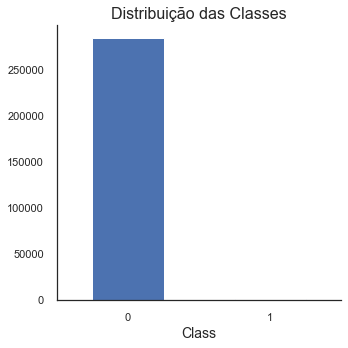

In [38]:
# Plotando o gráfico de barras
fig, ax = plt.subplots(figsize=(5,5))

df.Class.value_counts().plot(kind='bar')

plt.xticks(rotation=0)

ax.set_title("Distribuição das Classes", fontsize = 16)
ax.set_xlabel("Class", fontsize=14)

sns.despine()

plt.tight_layout()

No gráfico Distribuição de Classes nota-se claramente o desbalanceamento do conjunto de dados.

**Influência do atributo `Time` (Tempo) na ocorrência das Fraudes**

Agora serão plotados dois gráficos de barras um contendo as transações normais e outras as fraudulentas em função do tempo e então analisaremos o comportamento.

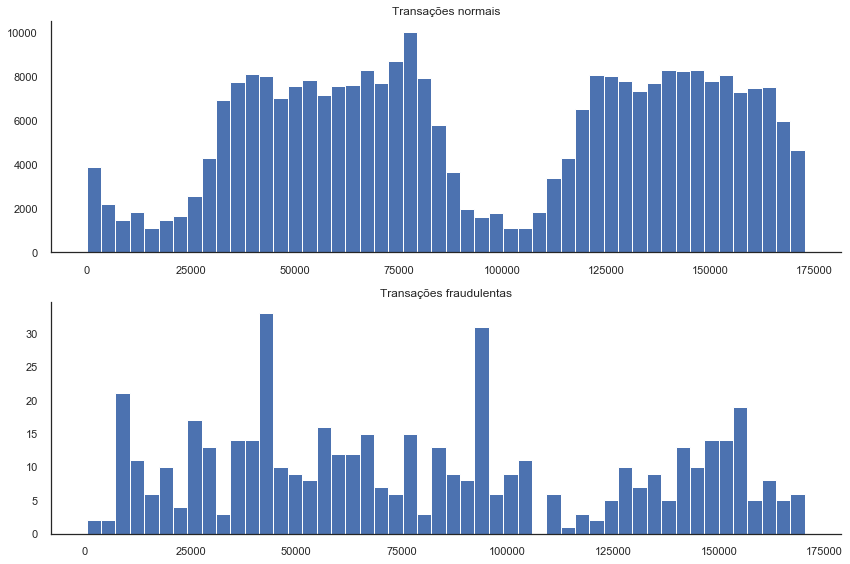

In [39]:
# Construindo os gráficos
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,8))

num_bins = 50

ax[0].hist(df.Time[df.Class==0], bins = num_bins)
ax[0].set_title('Transações normais')

ax[1].hist(df.Time[df.Class==1], bins = num_bins)
ax[1].set_title('Transações fraudulentas')

sns.despine()

plt.tight_layout()

Não é possível retirar nenhum informação relevante as partir dos gráficos de barras.

**Influência do atributo `Amount` (Tempo) na ocorrência das Fraudes**

Agora serão plotados dois gráficos de barras um contendo as transações normais e outras as fraudulentas em função do valor das transações (`Amount`) e então analisaremos o comportamento.

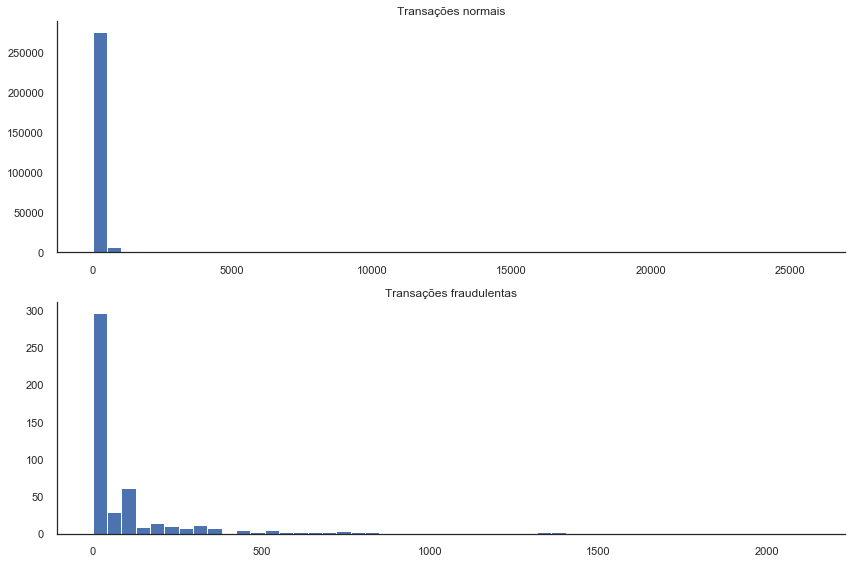

In [40]:
# Construindo os gráficos
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,8))

num_bins = 50

ax[0].hist(df.Amount[df.Class==0], bins = num_bins)
ax[0].set_title('Transações normais')

ax[1].hist(df.Amount[df.Class==1], bins = num_bins)
ax[1].set_title('Transações fraudulentas')

sns.despine()

plt.tight_layout()

Pelos gráficos de barras, percebe-se que tanto as transações normais como as fraudulentas ocorrem com valores baixos.

**Boxplot para o atributo `Amount` quando houve fraudes**

Para as transações normais, a média do valor gasto (Amount) é 88.29 e a mediana é 22.0.

Para as transações fraudulentas, a média do valor gasto (Amount) é 122.21 e a mediana é 9.25.



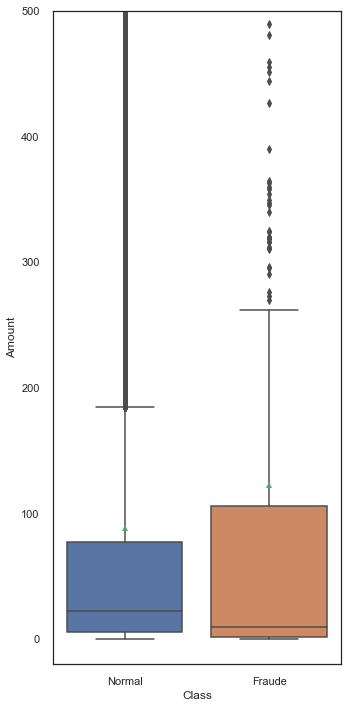

In [41]:
# Construindo o boxplot
fig, ax = plt.subplots(figsize=(5,10))

sns.boxplot(x=df.Class, y=df.Amount, orient='v', showmeans=True, ax=ax)

plt.ylim(-20, 500)
plt.xticks([0, 1], ['Normal', 'Fraude'])

plt.tight_layout()

print("Para as transações normais, a média do valor gasto (Amount) é {} e a mediana é {}.\n".format(round(df.Amount[df.Class==0].mean(), 2), round(df.Amount[df.Class==0].median(), 2)))
print("Para as transações fraudulentas, a média do valor gasto (Amount) é {} e a mediana é {}.\n".format(round(df.Amount[df.Class==1].mean(), 2), round(df.Amount[df.Class==1].median(), 2)))

Como podemos perceber, há uma distribuição um pouco diferente para cada tipo de transação, e isso pode auxiliar no treinamento do modelo de *Machine Learning*. Além disso, para as transações fraudulentas a média do valor gasto (`Amount`) é 122,21 e a mediana é 9,25.

## **Preparação dos dados**

**Padronização dos dados que não foram pré-processados**

Devemos padronizar os atributos `Time` e `Amount` para que todos os atributos fiquem na mesma ordem de grandeza. Assim:

In [42]:
# Padronização
df_clean = df.copy()

scaler = StandardScaler()

df_clean['pdz_amount'] = scaler.fit_transform(df_clean['Amount'].values.reshape(-1,1))
df_clean['pdz_time'] = scaler.fit_transform(df_clean['Time'].values.reshape(-1,1))

# Removendo os atributos não normalizados
df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# Visualizando as primeiras entradas do conjunto de dados padronizado
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,pdz_amount,pdz_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


**Separando o conjunto de dados em treino e teste**

Uma etapa de extrema importância para a construção do modelo de Machine Learning é separar o conjunto de dados em treino e teste, pois se não fizermos isso é bem provável que ocorra [*overfitting* (sobreajuste)](https://pt.wikipedia.org/wiki/Sobreajuste).

In [43]:
# Separando os dados entre feature matrix e target vector
X = df_clean.drop('Class', axis=1)
y = df_clean['Class']

# Dividindo os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

**Balanceamento dos dados**

Para realizar o balanceamento dos dados, existem vários métodos complexos tais como *Recognition-based Learning* e *Cost-sensitive Learning* e métodos mais simples que vem sendo amplamente utilizados com ótimos resultados como *Oversampling* e *Undersampling*.

Neste projeto, utilizaremos o método *Under-sampling* que foca na classe majoritário para balancear o conjunto de dados, ou seja, elimina aleatoriamente entradas da classe com maior quantidade de ocorrências.

Assim:

1    369
0    369
Name: Class, dtype: int64 



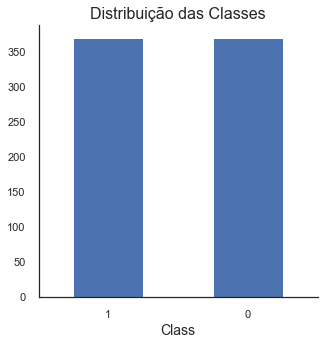

In [44]:
# Balanceamento dos dados
rus = RandomUnderSampler()

X_rus, y_rus = rus.fit_sample(X_train, y_train)

# Verificando o balanceamento dos dados
print(pd.Series(y_rus).value_counts(), "\n")

# Plotando a nova distribuição das classes
fig, ax = plt.subplots(figsize=(5,5))

y_rus.value_counts().plot(kind='bar')

plt.xticks(rotation=0)

ax.set_title("Distribuição das Classes", fontsize = 16)
ax.set_xlabel("Class", fontsize=14)

sns.despine()

Agora percebe-se que as duas classes representam 50% do conjunto de dados, ou seja, não há mais diferença entre as classes como havia inicialmente.

**Correlação entre os atributos**

Faremos um mapa de calor (*heatmap*) para verificar a correlação entre atributos utilizando o método de Pearson tanto para os dados desbalanceados como para os balanceados:

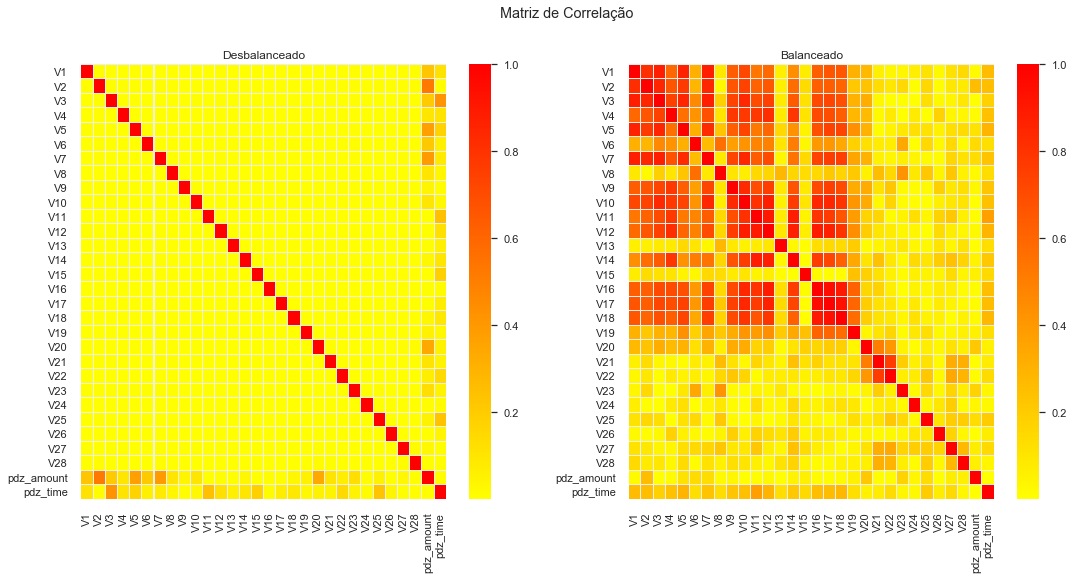

In [45]:
# Construindo o heatmap
fig, ax = plt.subplots(figsize=(18,8), nrows=1, ncols=2)
fig.suptitle("Matriz de Correlação")

sns.heatmap(X_train.corr().abs(), cmap='autumn_r', linecolor='#eeeeee', linewidths=0.01, ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(X_rus.corr().abs(), cmap='autumn_r', linecolor='#eeeeee', linewidths=0.01, ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()

Percebe-se que ouve um aumento na correlação entre os atributos após o balanceamento.

## **Modelos de *Machine Learning***

Após a preparação dos dados, iremos construir três modelos de *Machine Learning* e compará-los o desempenho de cada um deles. Os modelos utilizados serão:
- [**Regressão Logística**](https://pt.wikipedia.org/wiki/Regress%C3%A3o_log%C3%ADstica);
- [***Decision Tree* (Árvore de decisão)**](https://pt.wikipedia.org/wiki/%C3%81rvore_de_decis%C3%A3o);
- [**Naive Bayes Gaussiano**](https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Gaussian_na%C3%AFve_Bayes).

**Regressão Logística**

In [46]:
# Treinando o modelo de Regressão Logística
lr_model = LogisticRegression()
lr_model.fit(X_rus, y_rus)

# Previsões utilizando o modelo
y_pred = lr_model.predict(X_test)
y_prob = lr_model.predict_proba(X_test)

Após a criação do modelo, é necessário avaliar o seu desempenho. Então:

In [47]:
# Relatório de classificação
print("Relatório de classificação para a Regressão Logística:\n", classification_report(y_test, y_pred, digits=4))

# Acurácia do modelo
print("Acurácia:\t{}%".format(round(accuracy_score(y_test, y_pred) * 100, 2)))

# Área sob a curva
print("AUC:\t{}%".format(round(roc_auc_score(y_test, y_pred) * 100, 2)))

Relatório de classificação para a Regressão Logística:
               precision    recall  f1-score   support

           0     0.9998    0.9753    0.9874     71079
           1     0.0594    0.9024    0.1114       123

    accuracy                         0.9751     71202
   macro avg     0.5296    0.9388    0.5494     71202
weighted avg     0.9982    0.9751    0.9859     71202

Acurácia:	97.51%
AUC:	93.88%


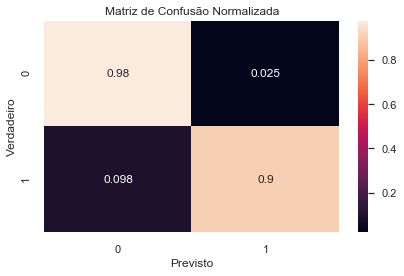

In [48]:
# Matriz de confusão
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, ax=ax);

ax.set_title('Matriz de Confusão Normalizada')
ax.set_ylabel('Verdadeiro')
ax.set_xlabel('Previsto')

plt.tight_layout()

Para dados altamente desbalanceados, a acurácia não é um bom indicador de desempenho do modelo (Para saber mais: [clique aqui](https://sigmoidal.ai/como-lidar-com-dados-desbalanceados/)).

No entanto, uma métrica interessante para avaliar é a Área sob a curva ([AUC ROC](https://medium.com/@eam.avelar/o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-2e2c4112033d)) e para a Regressão Logística tem-se um valor de 93,88%.

Ainda, na Matriz de Confusão Normalizada pode ser visualizado a taxa de acertos.

Também podemos plotar a curva ROC:

C:\Users\Dino\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


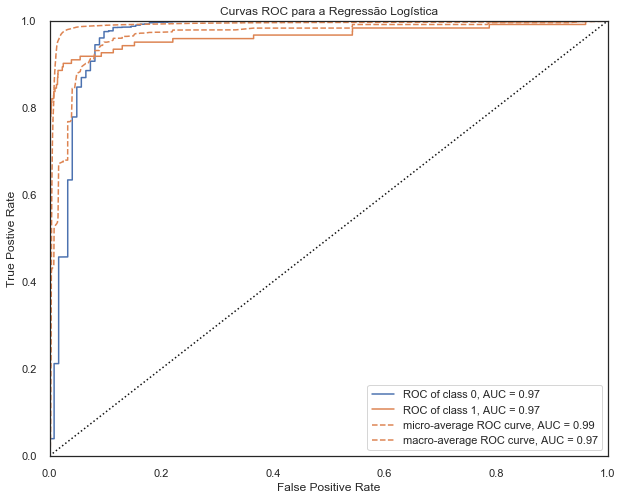

In [49]:
# Plotando a curva ROC
fig, ax = plt.subplots(figsize=(10,8))
vis_lr = ROCAUC(lr_model, classes=[0, 1], title="Curvas ROC para a Regressão Logística")

vis_lr.fit(X_rus, y_rus); # Ajusta os dados de treino ao visualizador
vis_lr.score(X_test, y_test); # Avalia o modelo com os dados de teste
vis_lr.show(); # Finaliza e mostra a figura

***Decision Tree* (Árvore de decisão)**

In [50]:
# Treinando o modelo de Árvore de decisão
dt_model = DecisionTreeClassifier(max_depth=4, criterion="entropy") # max_depth é a profundidade máxima de nós, aqui definimos como 4
dt_model.fit(X_rus, y_rus)

# Previsões utilizando o modelo
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)

Vamos avaliar o desempenho:

In [51]:
# Relatório de classificação
print("Relatório de classificação para a Árvore de decisão:\n", classification_report(y_test, y_pred_dt, digits=4))

# Acurácia do modelo
print("Acurácia:\t{}%".format(round(accuracy_score(y_test, y_pred_dt) * 100, 2)))

# Área sob a curva
print("AUC:\t{}%".format(round(roc_auc_score(y_test, y_pred_dt) * 100, 2)))

Relatório de classificação para a Árvore de decisão:
               precision    recall  f1-score   support

           0     0.9997    0.9693    0.9842     71079
           1     0.0450    0.8374    0.0854       123

    accuracy                         0.9690     71202
   macro avg     0.5224    0.9033    0.5348     71202
weighted avg     0.9981    0.9690    0.9827     71202

Acurácia:	96.9%
AUC:	90.33%


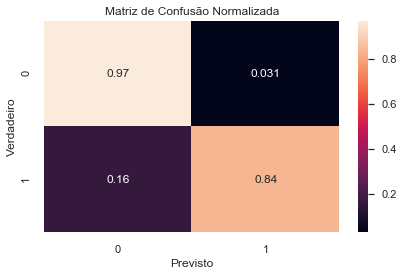

In [52]:
# Matriz de confusão
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_dt, normalize='true'), annot=True, ax=ax);

ax.set_title('Matriz de Confusão Normalizada')
ax.set_ylabel('Verdadeiro')
ax.set_xlabel('Previsto')

plt.tight_layout()

Para dados altamente desbalanceados, a acurácia não é um bom indicador de desempenho do modelo (Para saber mais: [clique aqui](https://sigmoidal.ai/como-lidar-com-dados-desbalanceados/)).

No entanto, uma métrica interessante para avaliar é a Área sob a curva ([AUC ROC](https://medium.com/@eam.avelar/o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-2e2c4112033d)) e para a Árvore de decisão tem-se um valor de 90,33%.

Ainda, na Matriz de Confusão Normalizada pode ser visualizado a taxa de acertos.

Também podemos plotar a curva ROC:

C:\Users\Dino\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


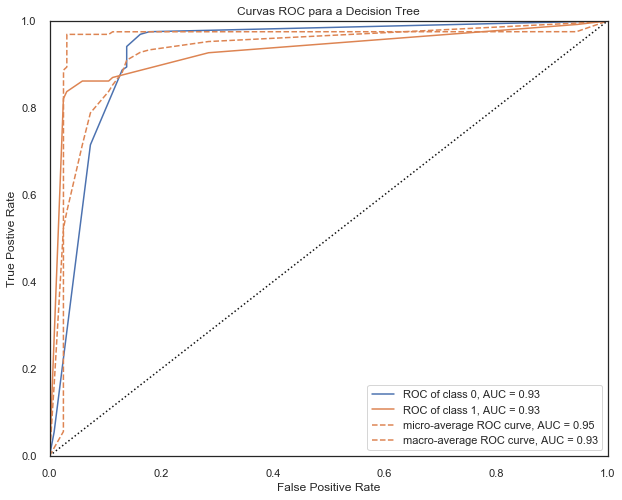

In [53]:
# Plotando a curva ROC
fig, ax = plt.subplots(figsize=(10,8))
vis_dt = ROCAUC(dt_model, classes=[0, 1], title="Curvas ROC para a Decision Tree")

vis_dt.fit(X_rus, y_rus); # Ajusta os dados de treino ao visualizador
vis_dt.score(X_test, y_test); # Avalia o modelo com os dados de teste
vis_dt.show(); # Finaliza e mostra a figura

Além disso, podemos visualizar como ficou a Árvore de decisão:

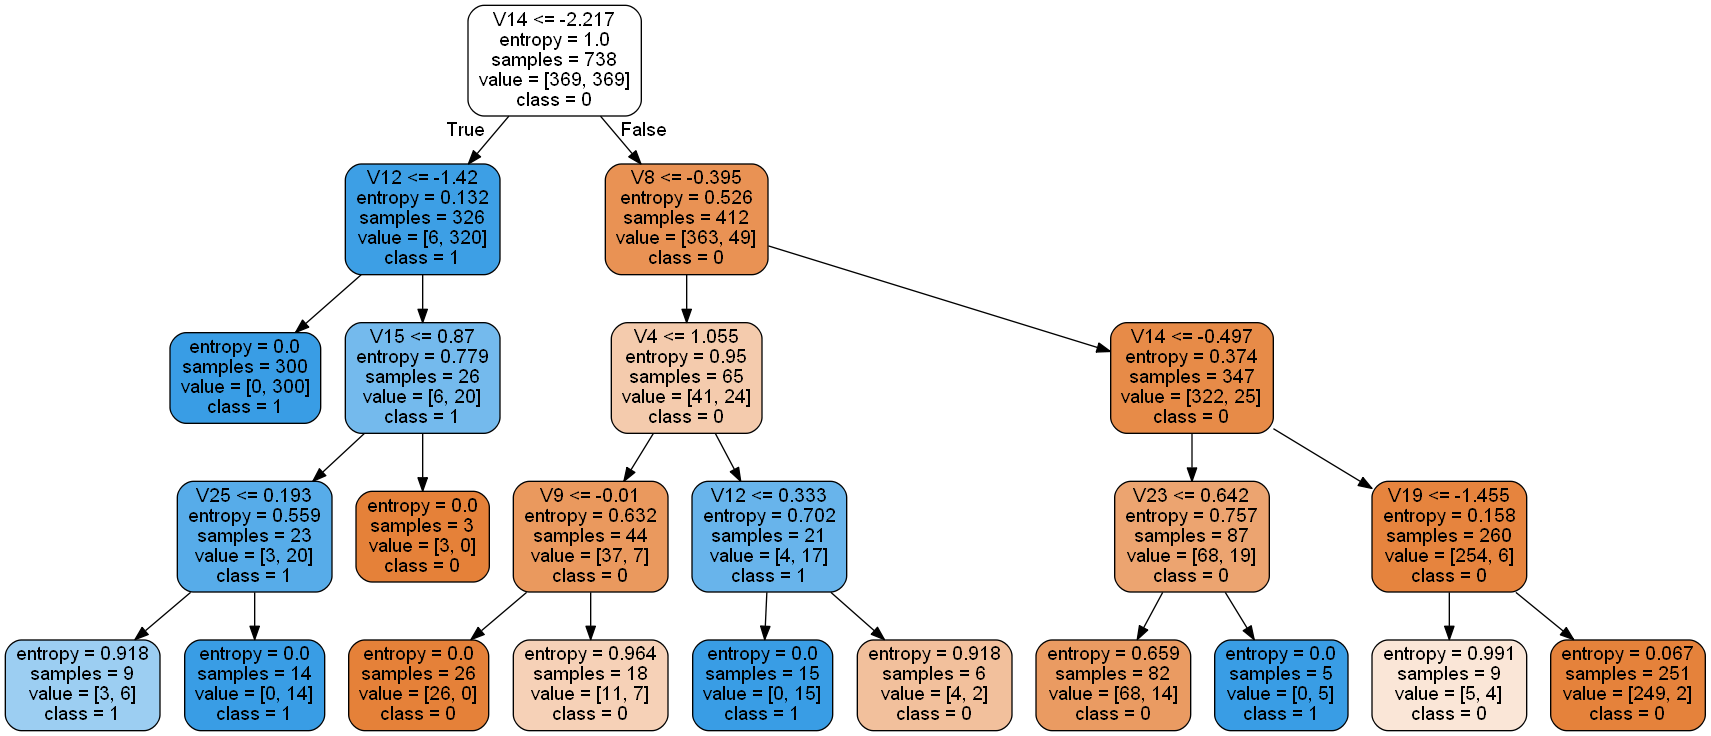

In [54]:
## Visualizando a árvore ##

# Importando as bibliotecas
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# Criando DOT
dot = export_graphviz(dt_model, filled=True, rounded=True, feature_names=X.columns, class_names=['0', '1'])

# Plotando
graph = pydotplus.graph_from_dot_data(dot)
Image(graph.create_png())

**Naive Bayes Gaussiano**

In [55]:
# Treinando o modelo de Naive Bayes Gaussiano
nb_model = GaussianNB()
nb_model.fit(X_rus, y_rus)

# Previsões utilizando o modelo
y_pred_nb = nb_model.predict(X_test)
y_prob_nb = nb_model.predict_proba(X_test)

Avaliando o desempenho:

In [56]:
# Relatório de classificação
print("Relatório de classificação para a Árvore de decisão:\n", classification_report(y_test, y_pred_nb, digits=4))

# Acurácia do modelo
print("Acurácia:\t{}%".format(round(accuracy_score(y_test, y_pred_nb) * 100, 2)))

# Área sob a curva
print("AUC:\t{}%".format(round(roc_auc_score(y_test, y_pred_nb) * 100, 2)))

Relatório de classificação para a Árvore de decisão:
               precision    recall  f1-score   support

           0     0.9997    0.9684    0.9838     71079
           1     0.0426    0.8130    0.0810       123

    accuracy                         0.9681     71202
   macro avg     0.5211    0.8907    0.5324     71202
weighted avg     0.9980    0.9681    0.9822     71202

Acurácia:	96.81%
AUC:	89.07%


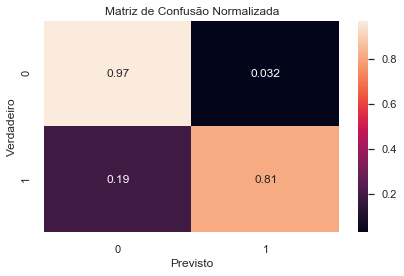

In [57]:
# Matriz de confusão
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_nb, normalize='true'), annot=True, ax=ax);

ax.set_title('Matriz de Confusão Normalizada')
ax.set_ylabel('Verdadeiro')
ax.set_xlabel('Previsto')

plt.tight_layout()

Para dados altamente desbalanceados, a acurácia não é um bom indicador de desempenho do modelo (Para saber mais: [clique aqui](https://sigmoidal.ai/como-lidar-com-dados-desbalanceados/)).

No entanto, uma métrica interessante para avaliar é a Área sob a curva ([AUC ROC](https://medium.com/@eam.avelar/o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-2e2c4112033d)) e para o modelo de Naive Bayes Gaussiano tem-se um valor de 89,07%.

Ainda, na Matriz de Confusão Normalizada pode ser visualizado a taxa de acertos.

Também podemos plotar a curva ROC:

C:\Users\Dino\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


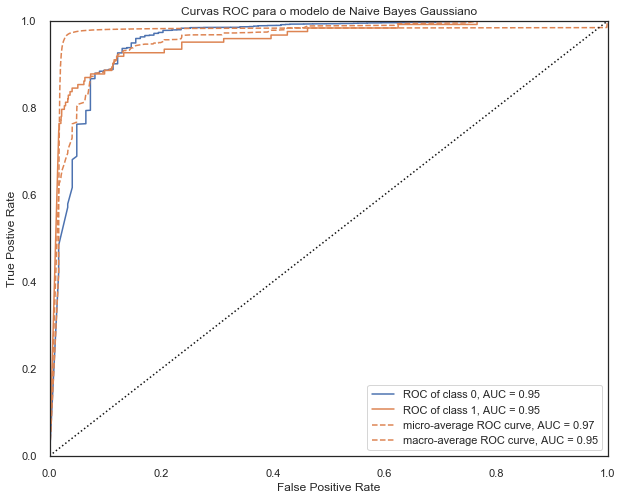

In [58]:
# Plotando a curva ROC
fig, ax = plt.subplots(figsize=(10,8))
vis_nb = ROCAUC(nb_model, classes=[0, 1], title="Curvas ROC para o modelo de Naive Bayes Gaussiano")

vis_nb.fit(X_rus, y_rus); # Ajusta os dados de treino ao visualizador
vis_nb.score(X_test, y_test); # Avalia o modelo com os dados de teste
vis_nb.show(); # Finaliza e mostra a figura

## **Considerações finais**

Após a execução do projeto, podemos inferir:
- Os três modelos apresentam acurácia acima de 90%, no entanto essa não é uma boa métrica para dados desbalanceados;
- Os três modelos apresentam AUC de, no mínimo, 89%, mas a Regressão Logística foi o que teve melhor desempenho tendo um AUC de 93,88%, enquanto tanto para a Árvore de Decisão como para o modelo de Naive Bayes Gaussiano essa métrica ficou em torno de 90%. Sendo assim, a minha sugestão é utilizar a Regressão Logística.

## **Referências bibliográficas**

- HELD, F. Talvez você não tenha problemas com fraude. Mas e com falsos-positivos?. 06 de março de 2017. Disponível em: https://blog.konduto.com/pt/2017/03/problema-com-falsos-positivos/.
- Fraude de cartão de crédito: como proteger seu varejo. Disponível em: https://empresas.serasaexperian.com.br/blog/fraude-de-cartao-de-credito/.
- GONZÁLEZ, M. Os 3 principais tipos de fraude de cartão de crédito e como solucioná-los. 09 de janeiro de 2020. Disponível em: https://blog.idwall.co/fraude-de-cartao-de-credito-principais-tipos/.
- Credit Card Fraud Detection. Disponível em: https://www.kaggle.com/mlg-ulb/creditcardfraud.
- Análise de componentes principais. Disponível em: https://pt.wikipedia.org/wiki/An%C3%A1lise_de_componentes_principais.
- Sobreajuste. Disponível em: https://pt.wikipedia.org/wiki/Sobreajuste.
- Regressão logística. Disponível em: https://pt.wikipedia.org/wiki/Regress%C3%A3o_log%C3%ADstica.
- MELO, C. Como lidar com dados desbalanceados?. 24  de dezembro de 2019. Disponível em: https://sigmoidal.ai/como-lidar-com-dados-desbalanceados/.
- AVELAR, A. O que é AUC e ROC nos modelos de Machine Learning. 21  de maio de 2019. Disponível em: https://medium.com/@eam.avelar/o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-2e2c4112033d.
- Naive Bayes classifier. Disponível em: https://en.wikipedia.org/wiki/Naive_Bayes_classifier.